In [5]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
plt.style.use("dark_background")

In [4]:
df = pd.read_excel('purchase.xlsx')
df.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


In [26]:
x = df[['Sales',	'Order_Quan', 'Profit', 'Shipping_Cost', 'Product_Base_Margin']]

In [18]:
x.shape

(5977, 5)

In [27]:
# remove outliers using 1.5 IQR rule
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1
x = x[~((x < (q1 - 1.5 * iqr)) | (x > (q3 + 1.5 * iqr))).any(axis=1)]

In [20]:
x.shape

(5192, 5)

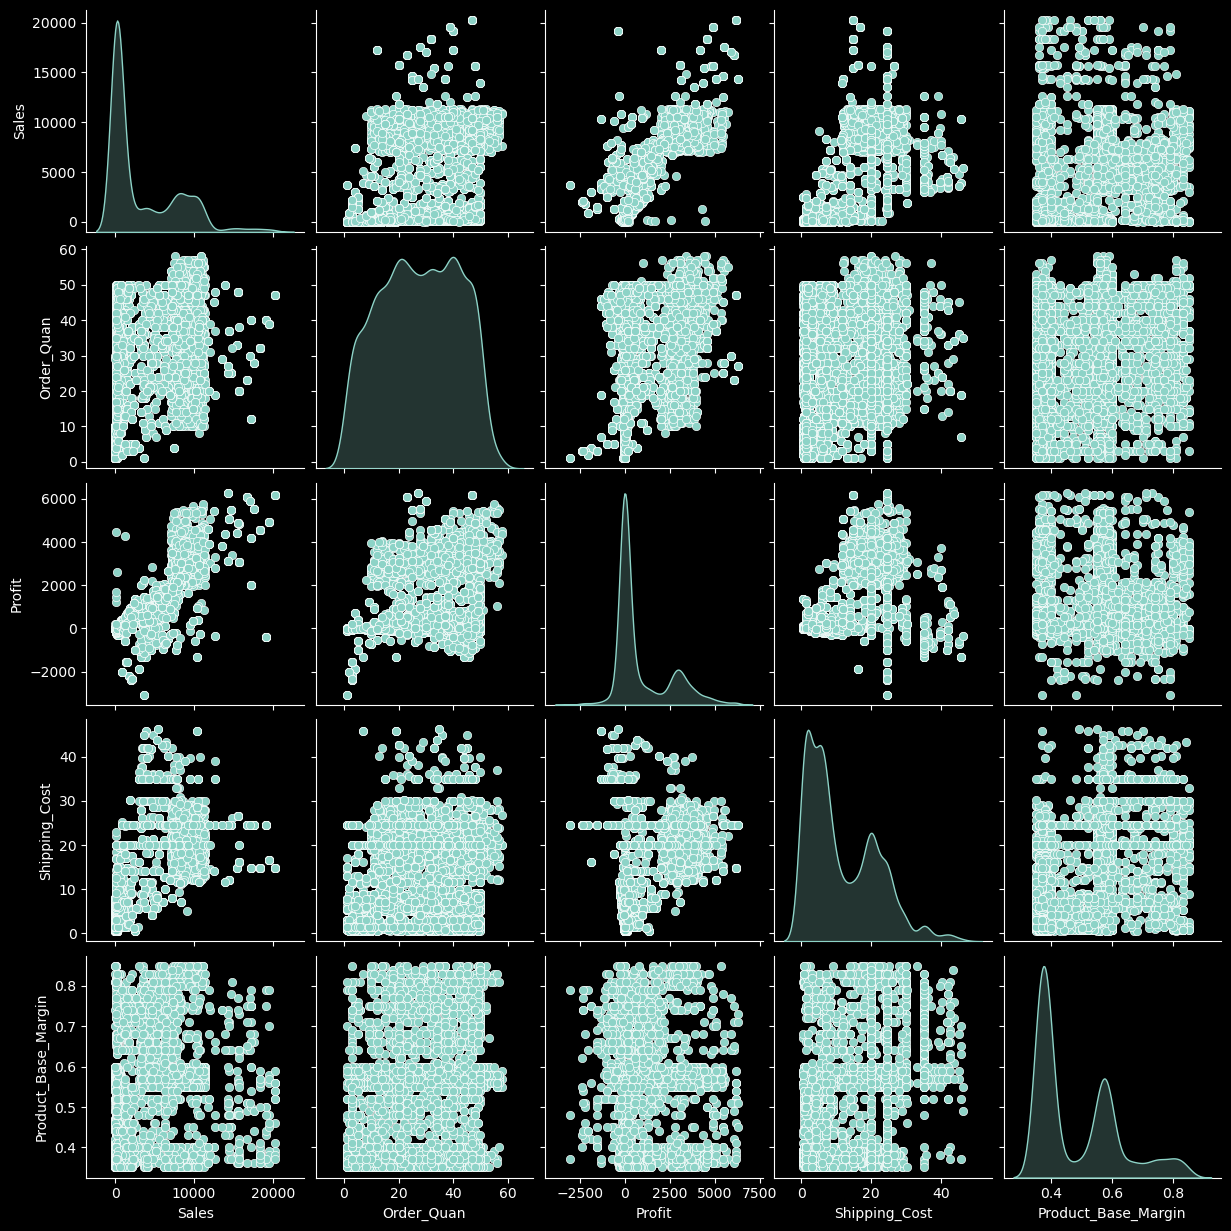

In [22]:
sns.pairplot(x, diag_kind='kde')

In [28]:
# standardize the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

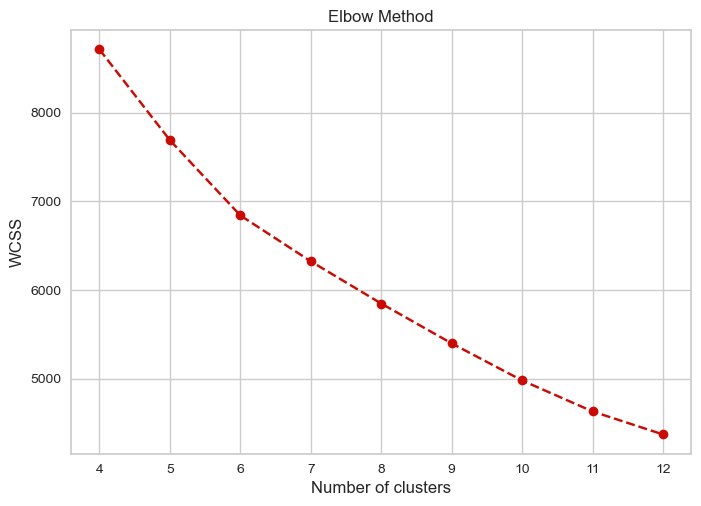

In [36]:
wcss = []
for i in range(4, 13):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(4, 13), wcss, marker='o', linestyle='--', color='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

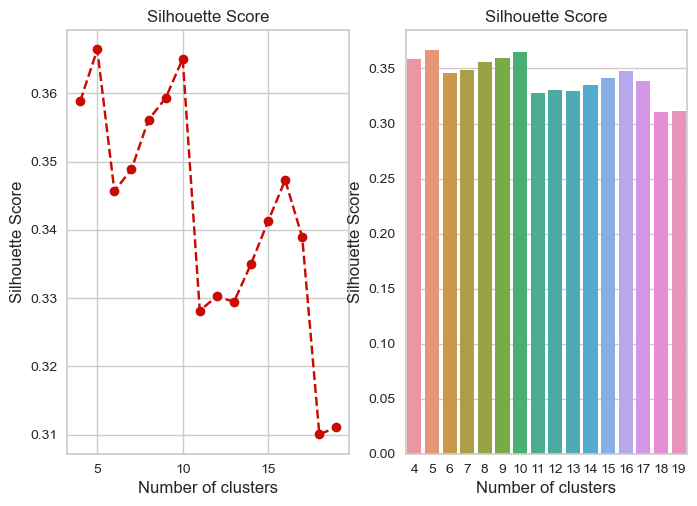

In [41]:
# silhouette score
silhouette_scores = []
for i in range(4, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.predict(x)))

plt.subplot(1, 2, 1)
plt.plot(range(4, 20), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.subplot(1, 2, 2)
sns.barplot(x=list(range(4, 20)), y=silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


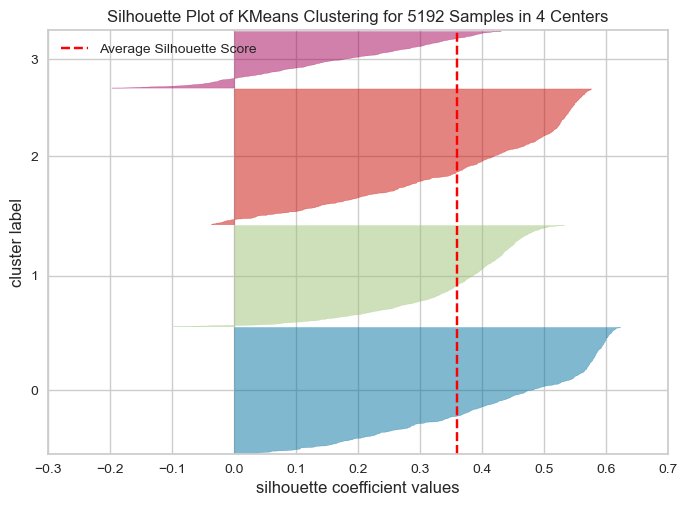

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


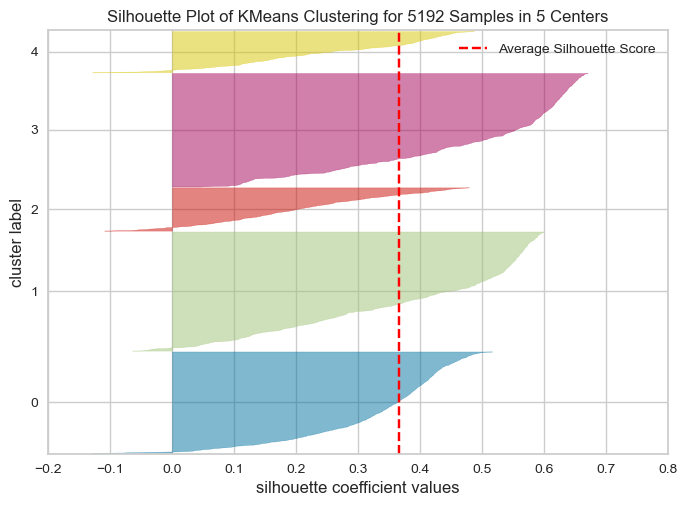

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


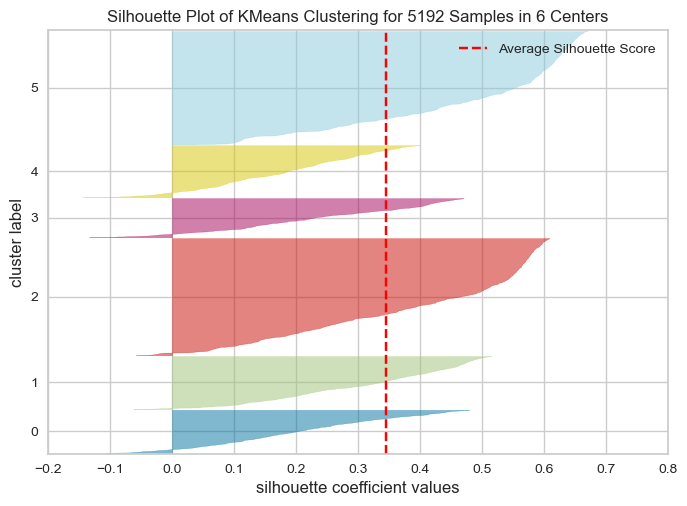

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


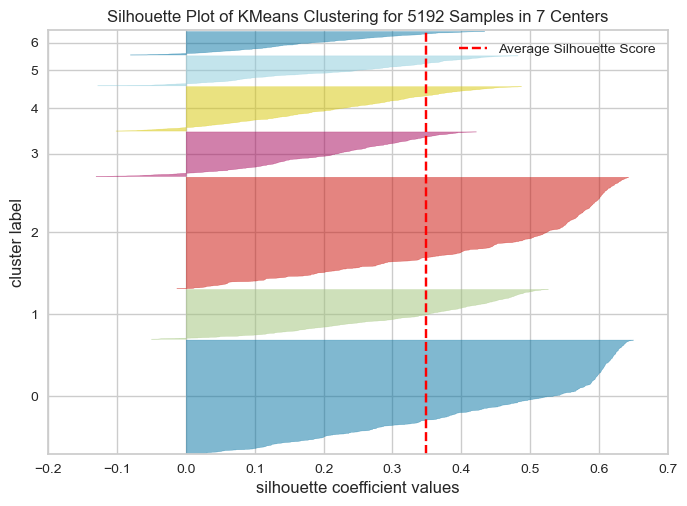

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


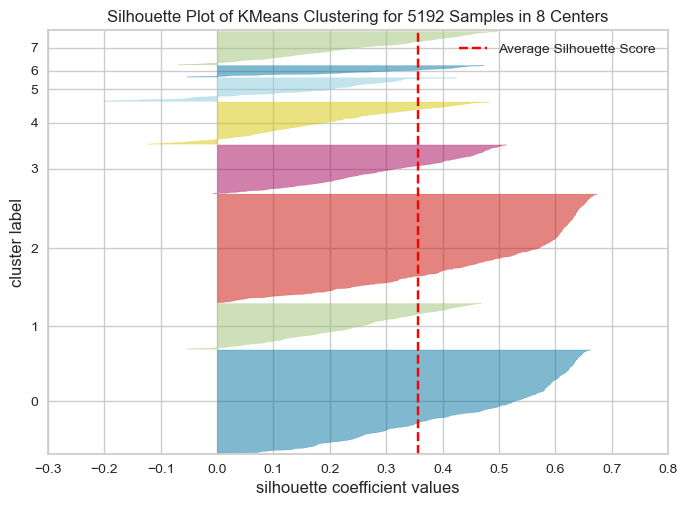

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


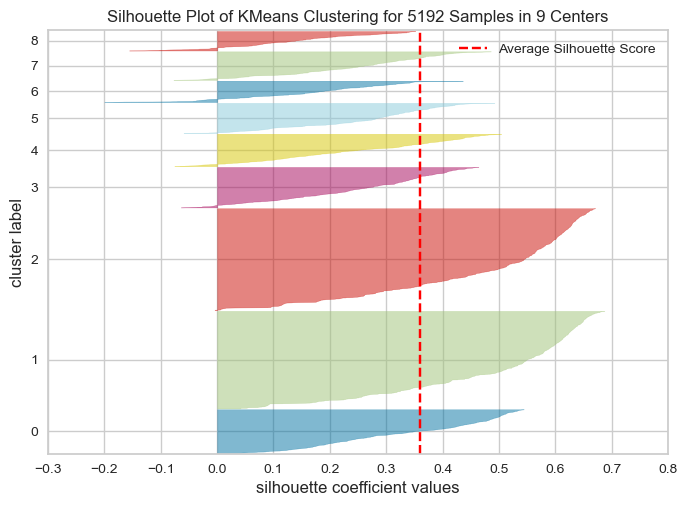

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


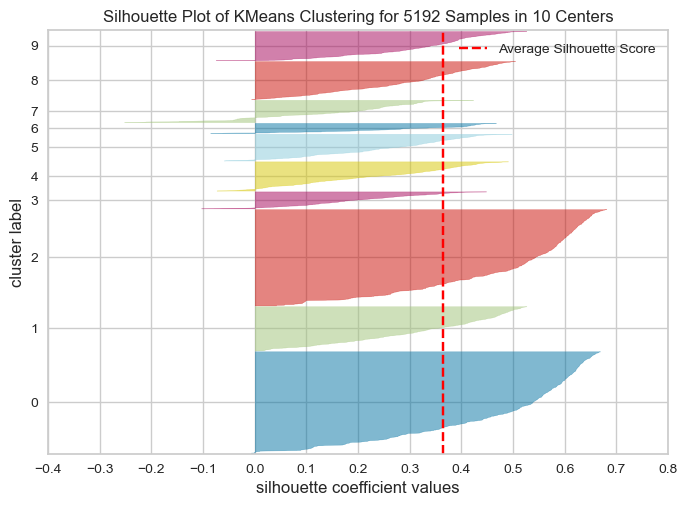

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


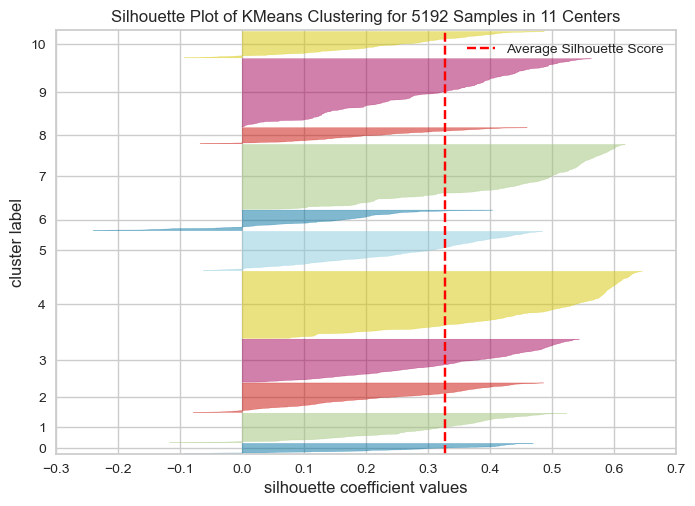

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


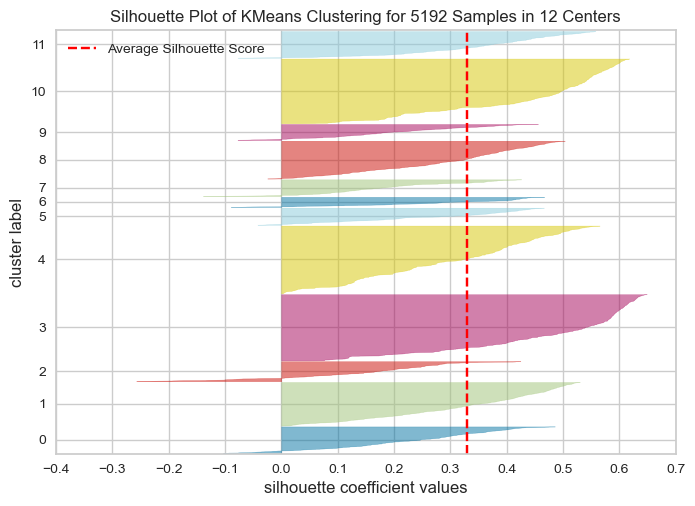

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


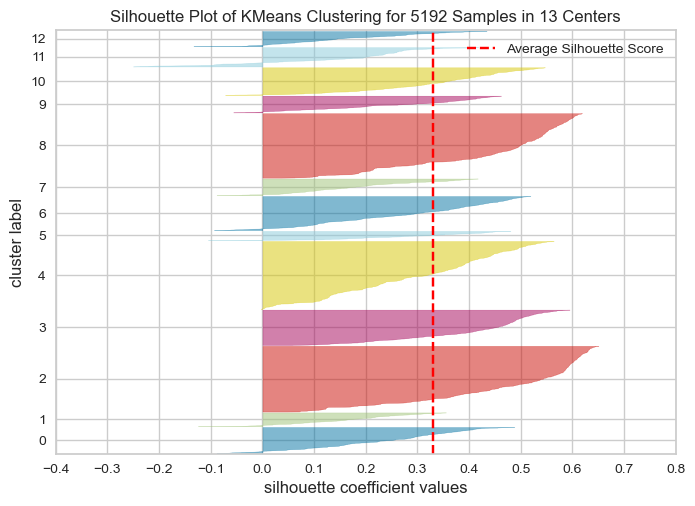

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


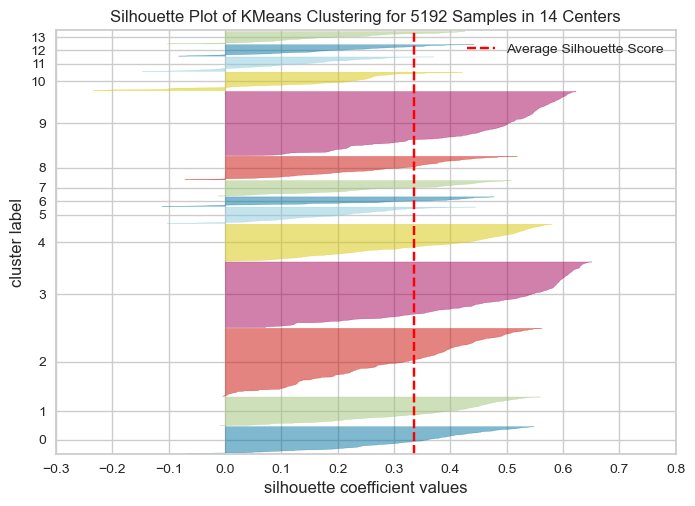

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


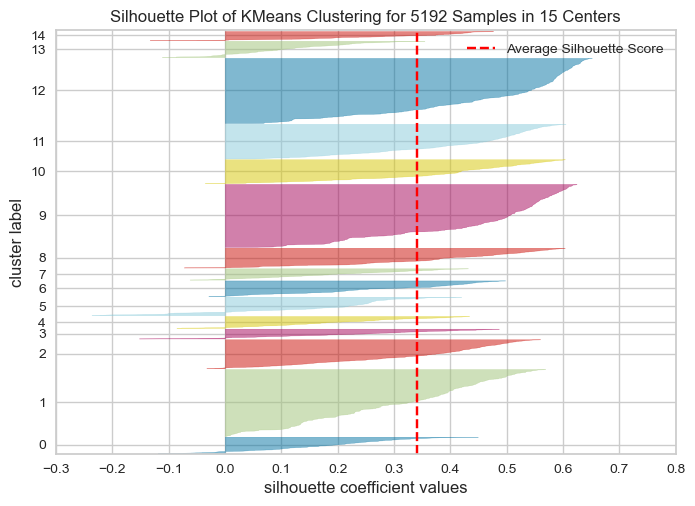

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


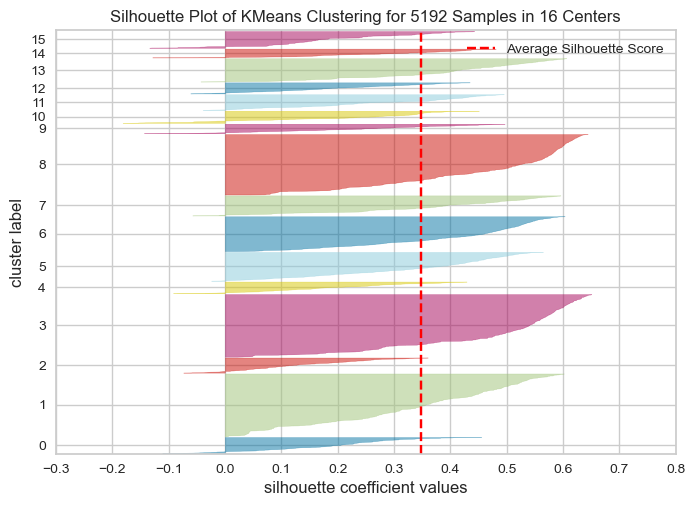

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


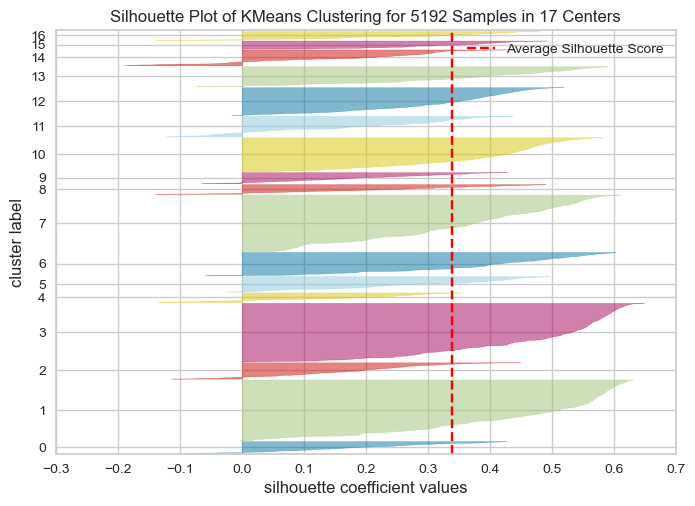

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


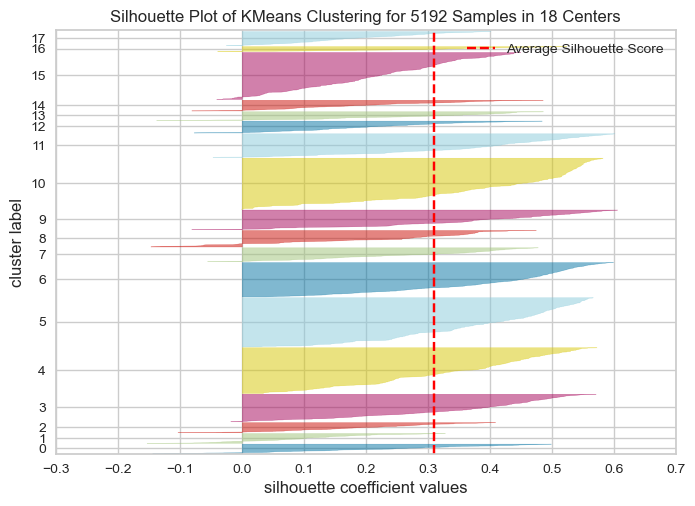

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


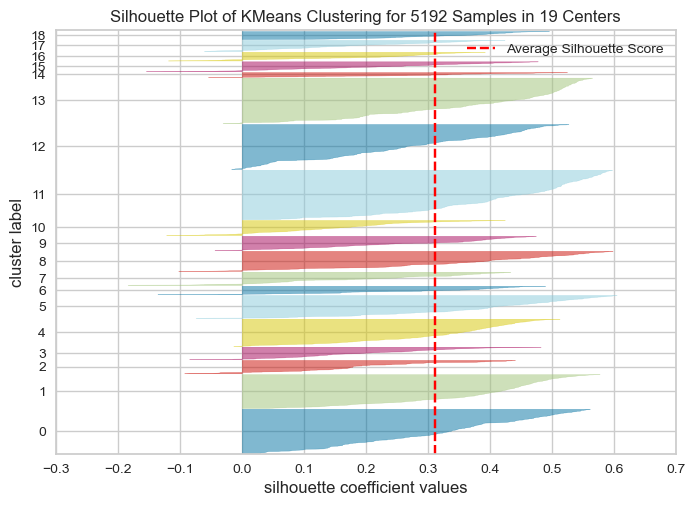

In [43]:
# silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(4, 20):
    km = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(x)
    visualizer.poof()

In [52]:
z = linkage(x, method='ward')
len(cophenet(z))

13475836

In [51]:
euc_dist = euclidean_distances(x)
actual_dist = euc_dist[np.triu_indices(5192, k=1)]
len(actual_dist)

13475836

In [53]:
cophenet(z, actual_dist)

(0.7772274556460056,
 array([ 63.44276995, 155.83695925, 155.83695925, ...,  34.143843  ,
         34.143843  ,   7.3094867 ]))

In [45]:
agg_model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_model.fit(x)
agg_model.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)
kmeans.labels_

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, ..., 1, 1, 1])

In [55]:
x['Labels_kmeans'] = kmeans.labels_
x['Labels_agg'] = agg_model.labels_

In [56]:
x.head()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Labels_kmeans,Labels_agg
0,1.688612,0.870458,1.134118,1.060572,0.626189,1,0
1,1.620900,-0.038853,1.370695,1.232354,0.552718,1,0
2,-0.588257,-1.018112,-0.561488,-0.270991,-0.843235,2,1
3,-0.629063,-0.388588,-0.520203,-0.058550,-0.696292,2,1
4,1.513502,1.569928,2.784204,0.908103,-0.916706,1,0


Text(0.5, 1.0, 'Agglomerative Clustering')

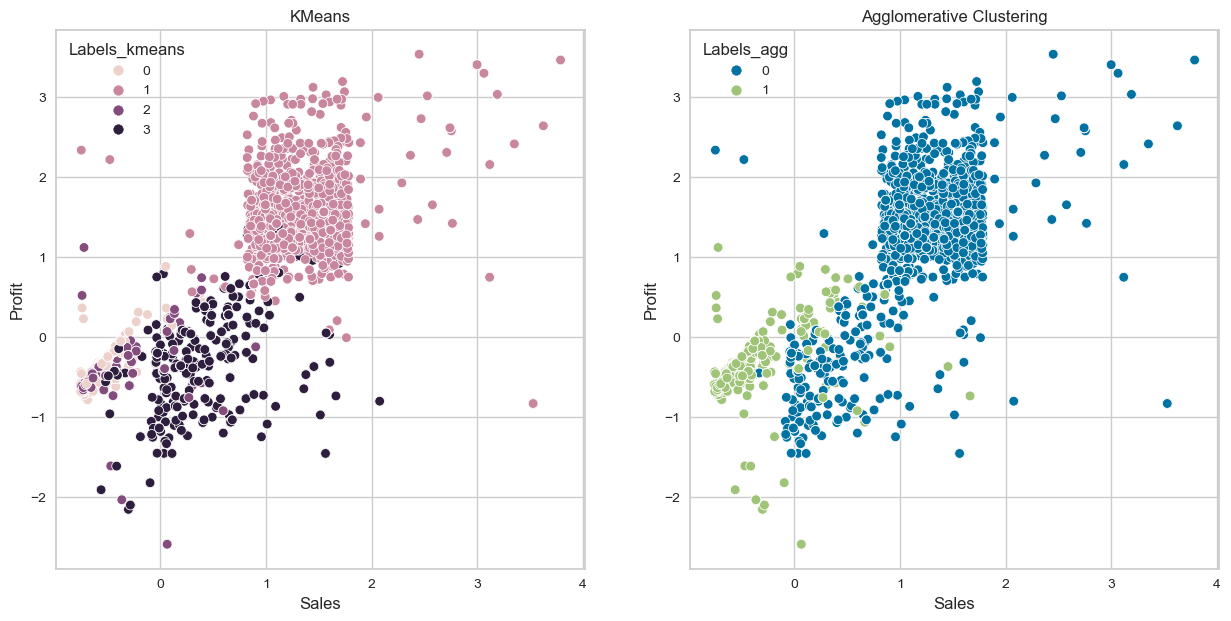

In [61]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Sales', y='Profit', hue='Labels_kmeans', data=x)
plt.title('KMeans')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Sales', y='Profit', hue='Labels_agg', data=x)
plt.title('Agglomerative Clustering')

In [67]:
# 3d plot using plotly
import plotly.express as px
fig = px.scatter_3d(x, x='Sales', y='Profit', z='Order_Quan', color='Labels_kmeans')
fig.update_layout(width=1000, height=800)
fig.show()